# Decision Tree Classifier

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report


In [2]:
df = pd.read_csv('Data_preprocessed_10000.csv')

X = df.drop("Diabetes_binary", axis=1)
y = df["Diabetes_binary"]

# Preview the data
X.head()


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,-1.071593,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,10.0,4.0,5.0
1,0.0,0.0,1.0,0.628607,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,1.0,0.0,13.0,5.0,4.0
2,1.0,1.0,1.0,-0.319133,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,5.0,0.0,1.0,8.0,6.0,6.0
3,0.0,1.0,1.0,0.017644,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,7.0,5.0,8.0
4,1.0,0.0,1.0,2.311887,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,4.0,30.0,10.0,1.0,1.0,6.0,6.0,3.0


In [3]:
#X = X.drop(columns=["GenHlth", "MentHlth", "PhysHlth"])

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [5]:
# Initialize and train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

Accuracy: 0.6556002682763246
F1 Score: 0.6545576858392197

Classification Report:
               precision    recall  f1-score   support

         0.0       0.67      0.64      0.66      1526
         1.0       0.64      0.67      0.65      1456

    accuracy                           0.66      2982
   macro avg       0.66      0.66      0.66      2982
weighted avg       0.66      0.66      0.66      2982



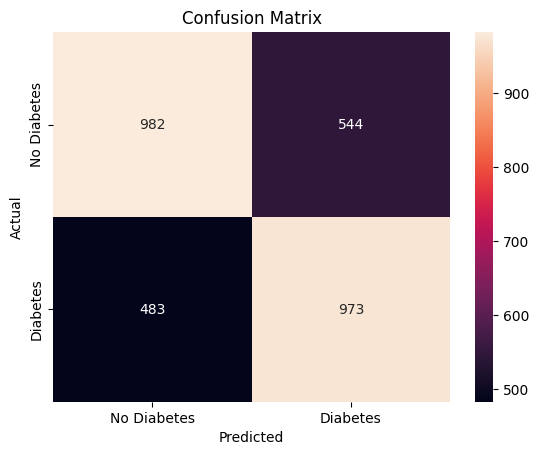

In [6]:
# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='g', xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [7]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(2, 10),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'min_impurity_decrease': list(np.linspace(0,0.5,5))
}
clf = GridSearchCV(
    DecisionTreeClassifier(random_state=42), 
    param_grid = params,
    scoring = 'f1',  
    cv = cv,  
    n_jobs = -1
) 
clf.fit(X_train, y_train)

print(f"Best Params = {clf.best_params_}  -  F1 Score = {clf.best_score_:.4f}")

Best Params = {'criterion': 'gini', 'max_depth': 4, 'min_impurity_decrease': np.float64(0.0), 'min_samples_leaf': 1, 'min_samples_split': 2}  -  F1 Score = 0.7431


Accuracy: 0.7119382964453387
F1 Score: 0.7204685974617637

Classification Report:
               precision    recall  f1-score   support

         0.0       0.74      0.67      0.70      1526
         1.0       0.68      0.76      0.72      1456

    accuracy                           0.71      2982
   macro avg       0.71      0.71      0.71      2982
weighted avg       0.72      0.71      0.71      2982



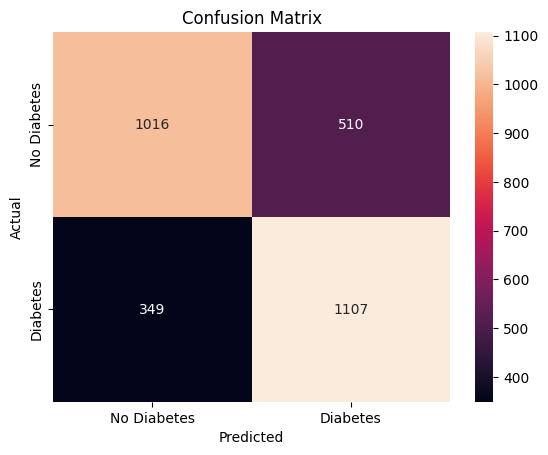

In [8]:
# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='g', xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

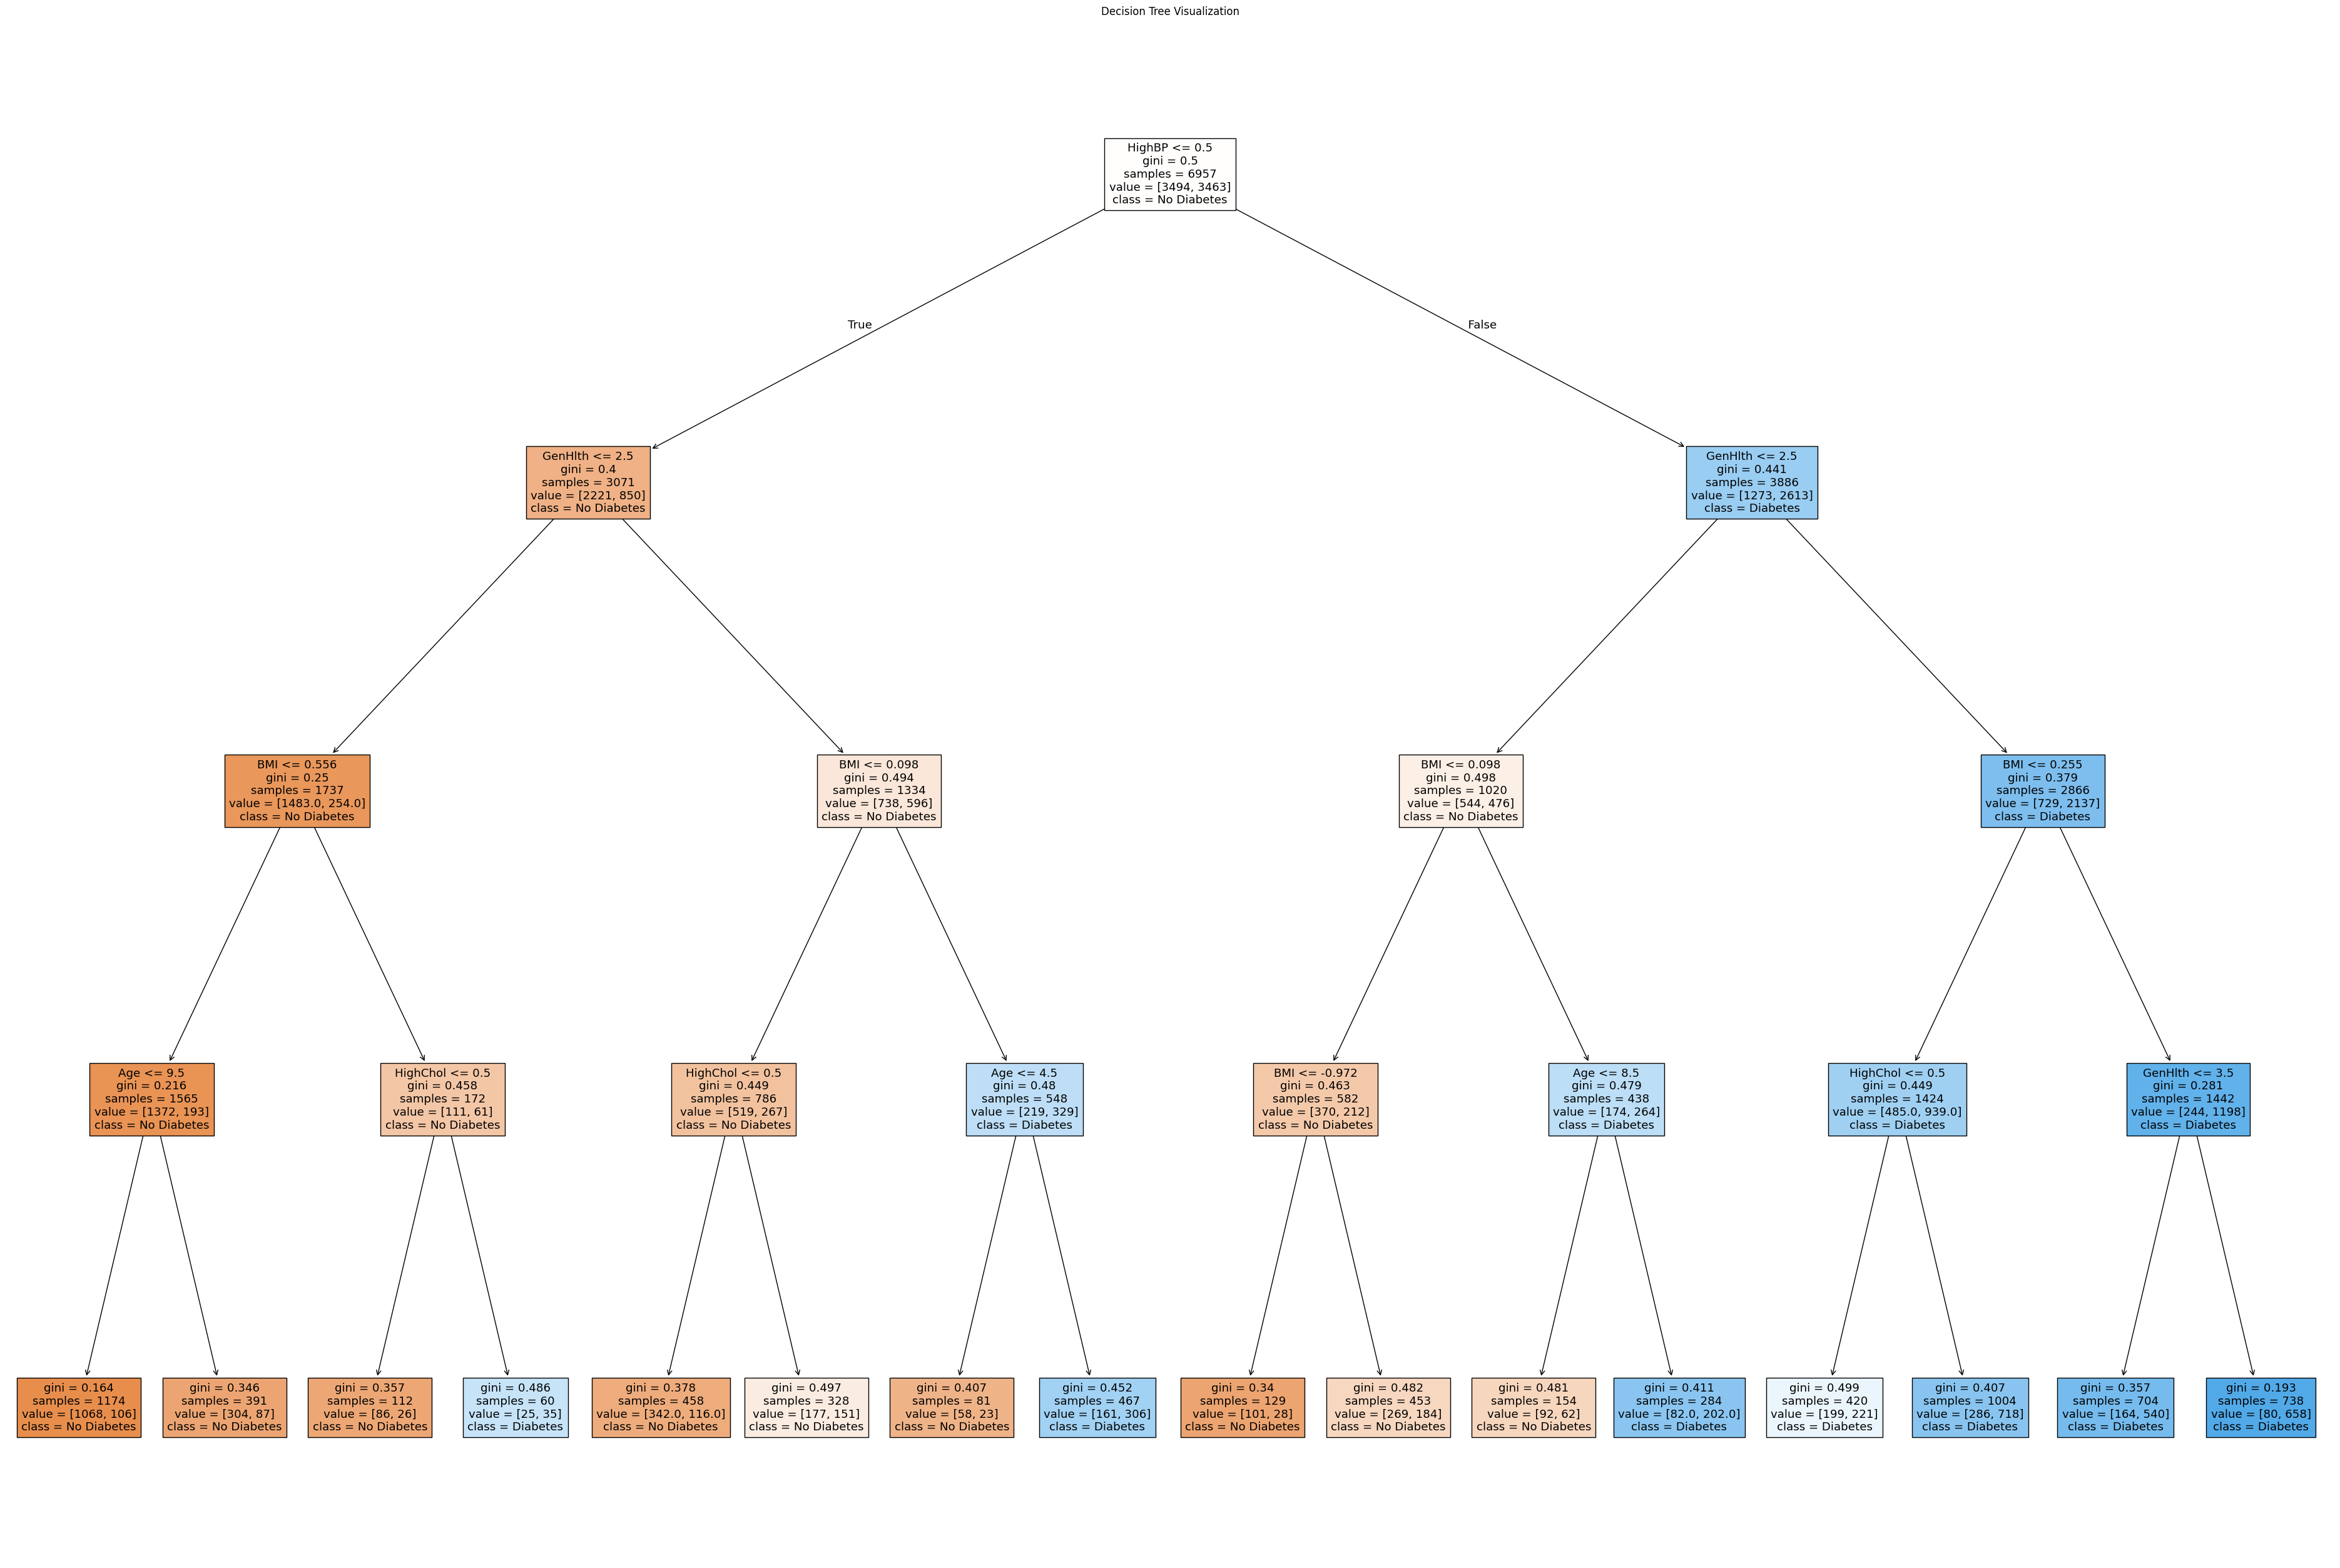

In [9]:
# Visualize the decision tree
plt.figure(figsize=(48, 32))  
plot_tree(clf.best_estimator_, feature_names=X.columns, class_names=["No Diabetes", "Diabetes"], filled=True)
plt.title("Decision Tree Visualization")
plt.show()

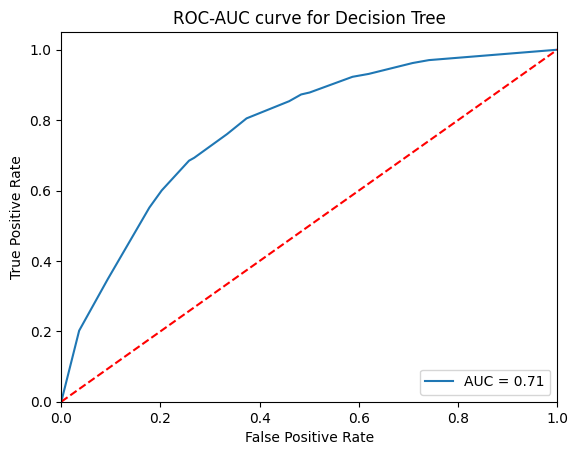

In [10]:
#ROC-AUC CURVE

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
dt_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC = %0.2f' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC curve for Decision Tree')
plt.legend(loc="lower right")
plt.show()